# Analyse des données Super Loto

Ce notebook permet d'analyser les tirages historiques du Super Loto à partir du fichier consolidé `super_loto_all.csv`.

## Objectifs
- Explorer la structure des données
- Identifier les numéros les plus fréquents
- Analyser les tendances temporelles
- Visualiser les distributions

### 📝 Note sur les données

Les données proviennent de 4 fichiers sources fusionnés et nettoyés :
- **nouveau_superloto.csv** (23 tirages)
- **sloto.csv** (43 tirages)  
- **superloto_201907.csv** (30 tirages)
- **superloto2017.csv** (4 tirages)

**Améliorations appliquées** :
- ✓ Suppression des colonnes vides
- ✓ Dates standardisées (YYYY-MM-DD)
- ✓ Nombres uniformisés (format décimal cohérent)
- ✓ Tri chronologique
- ✓ Types de données optimisés

## 1. Import des bibliothèques

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configuration pour de meilleurs graphiques
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("Bibliothèques importées avec succès !")

Bibliothèques importées avec succès !


## 2. Chargement des données

In [45]:
# Charger le fichier CSV nettoyé
# Ce fichier a été nettoyé avec :
# - Suppression des colonnes vides
# - Dates unifiées au format YYYY-MM-DD
# - Nombres standardisés (points décimaux)
# - Types de données cohérents
df = pd.read_csv('data/loto_super_all_clean.csv', sep=';', low_memory=False)

print(f"Nombre de tirages : {len(df)}")
print(f"Nombre de colonnes : {len(df.columns)}")
print(f"Période couverte : {df['date_de_tirage'].min()} à {df['date_de_tirage'].max()}")
print(f"\nPremières lignes du dataset :")
df.head()

Nombre de tirages : 100
Nombre de colonnes : 36
Période couverte : 1996-05-15 à 2025-10-31

Premières lignes du dataset :


,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,numero_chance,...,boule_complementaire,nombre_de_gagnant_au_rang7,rapport_du_rang7,nombre_de_gagnant_au_rang8,rapport_du_rang8,nombre_de_gagnant_au_rang9,rapport_du_rang9,nombre_de_codes_gagnants,rapport_codes_gagnants,codes_gagnants
0,1996001,ME,1996-05-15,1996-07-15,5,28,47,20,49,NaN,...,18.0,553701.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997001,JE,1997-02-13,1997-04-14,17,38,2,11,1,NaN,...,23.0,452936.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997002,JE,1997-03-20,1997-05-20,45,11,15,5,22,NaN,...,8.0,642944.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998001,VE,1998-03-13,1998-05-12,41,44,27,39,40,NaN,...,25.0,319712.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998002,VE,1998-10-02,1998-12-01,22,45,19,10,11,NaN,...,3.0,354974.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Exploration de la structure

In [46]:
# Informations sur les colonnes
print("Colonnes disponibles :")
print(df.columns.tolist())
print(f"\nTypes de données :")
df.info()

Colonnes disponibles :
['annee_numero_de_tirage', 'jour_de_tirage', 'date_de_tirage', 'date_de_forclusion', 'boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5', 'numero_chance', 'combinaison_gagnante_en_ordre_croissant', 'nombre_de_gagnant_au_rang1', 'rapport_du_rang1', 'nombre_de_gagnant_au_rang2', 'rapport_du_rang2', 'nombre_de_gagnant_au_rang3', 'rapport_du_rang3', 'nombre_de_gagnant_au_rang4', 'rapport_du_rang4', 'nombre_de_gagnant_au_rang5', 'rapport_du_rang5', 'nombre_de_gagnant_au_rang6', 'rapport_du_rang6', 'numero_jokerplus', 'devise', 'boule_6', 'boule_complementaire', 'nombre_de_gagnant_au_rang7', 'rapport_du_rang7', 'nombre_de_gagnant_au_rang8', 'rapport_du_rang8', 'nombre_de_gagnant_au_rang9', 'rapport_du_rang9', 'nombre_de_codes_gagnants', 'rapport_codes_gagnants', 'codes_gagnants']

Types de données :
<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  --

In [47]:
# Valeurs manquantes
print("Valeurs manquantes par colonne :")
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Valeurs manquantes par colonne :


rapport_codes_gagnants        66
rapport_du_rang9              66
nombre_de_gagnant_au_rang9    66
rapport_du_rang8              66
nombre_de_gagnant_au_rang8    66
codes_gagnants                66
nombre_de_codes_gagnants      66
boule_6                       57
boule_complementaire          57
numero_chance                 43
numero_jokerplus              35
nombre_de_gagnant_au_rang7    23
rapport_du_rang7              23
dtype: int64

## 4. Analyse des numéros tirés

Analysons les 5 boules principales (boule_1 à boule_5) et le numéro chance.

In [48]:
# Collecter tous les numéros des 5 boules principales
all_numbers = []

for col in ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']:
    if col in df.columns:
        numbers = df[col].dropna()
        all_numbers.extend(numbers.astype(int).tolist())

# Compter les occurrences
number_counts = Counter(all_numbers)
most_common = number_counts.most_common(10)

print("Les 10 numéros les plus fréquents :")
for num, count in most_common:
    print(f"Numéro {num:2d} : {count} fois")

Les 10 numéros les plus fréquents :
Numéro 45 : 17 fois
Numéro  1 : 17 fois
Numéro 10 : 16 fois
Numéro  9 : 16 fois
Numéro 19 : 16 fois
Numéro  8 : 14 fois
Numéro 48 : 14 fois
Numéro 28 : 14 fois
Numéro  2 : 14 fois
Numéro 15 : 13 fois


## 5. Visualisation des fréquences

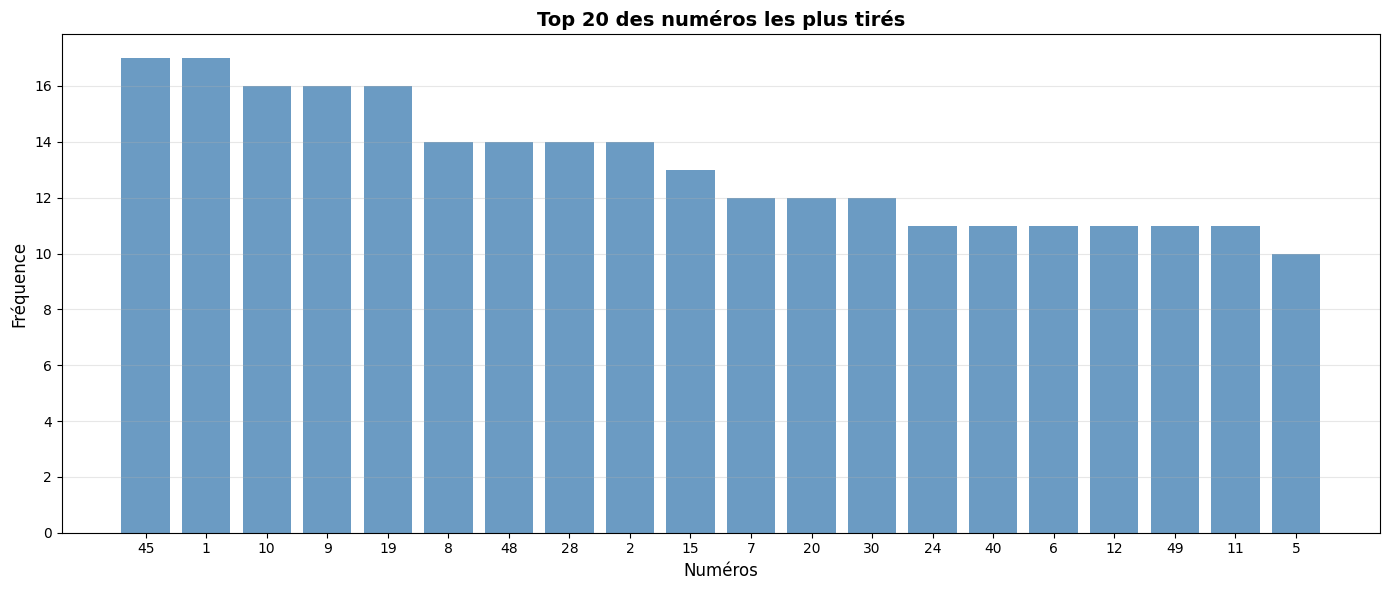

In [49]:
# Graphique des 20 numéros les plus fréquents
top_20 = number_counts.most_common(20)
numbers, counts = zip(*top_20)

plt.figure(figsize=(14, 6))
plt.bar(range(len(numbers)), counts, color='steelblue', alpha=0.8)
plt.xlabel('Numéros', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.title('Top 20 des numéros les plus tirés', fontsize=14, fontweight='bold')
plt.xticks(range(len(numbers)), numbers)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

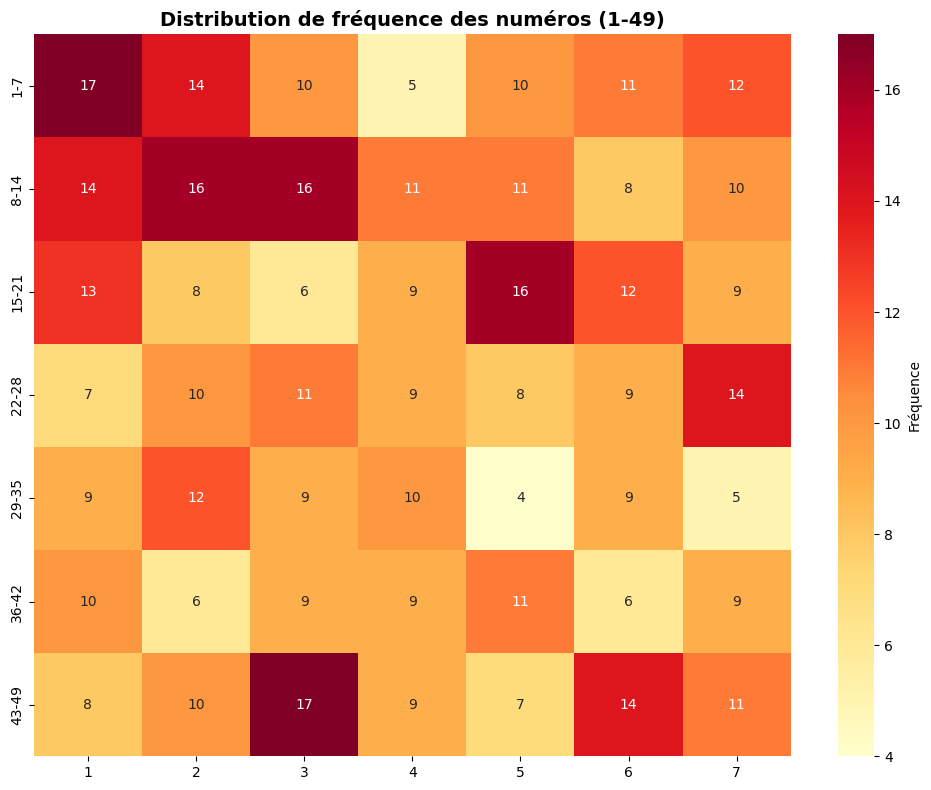

In [50]:
# Heatmap de la distribution de tous les numéros (1 à 49)
freq_dict = {i: number_counts.get(i, 0) for i in range(1, 50)}
freq_values = list(freq_dict.values())

# Créer une matrice 7x7 pour les numéros 1-49
matrix = np.array(freq_values[:49]).reshape(7, 7)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrRd', 
            xticklabels=range(1, 8), 
            yticklabels=[f"{i*7+1}-{min((i+1)*7, 49)}" for i in range(7)],
            cbar_kws={'label': 'Fréquence'})
plt.title('Distribution de fréquence des numéros (1-49)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Analyse du numéro chance

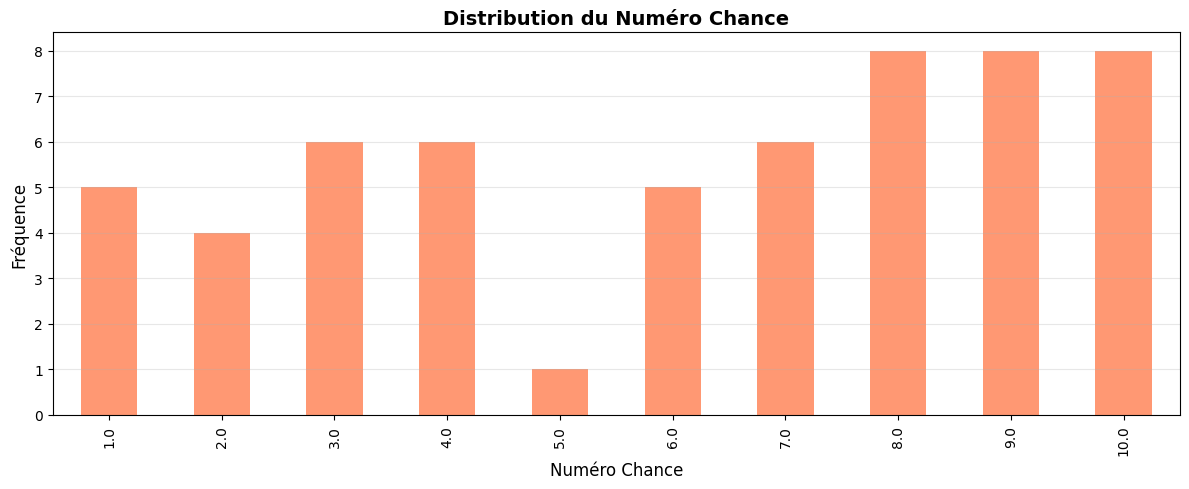


Numéro chance le plus fréquent : 8.0 (8 fois)


In [51]:
# Analyser le numéro chance s'il existe
if 'numero_chance' in df.columns:
    chance_numbers = df['numero_chance'].dropna()
    
    if len(chance_numbers) > 0:
        chance_counts = chance_numbers.value_counts().sort_index()
        
        plt.figure(figsize=(12, 5))
        chance_counts.plot(kind='bar', color='coral', alpha=0.8)
        plt.xlabel('Numéro Chance', fontsize=12)
        plt.ylabel('Fréquence', fontsize=12)
        plt.title('Distribution du Numéro Chance', fontsize=14, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"\nNuméro chance le plus fréquent : {chance_counts.idxmax()} ({chance_counts.max()} fois)")
    else:
        print("Pas de données pour le numéro chance")
else:
    print("Colonne 'numero_chance' non trouvée")

## 7. Statistiques descriptives

In [52]:
# Calculer les statistiques sur les numéros tirés
stats_df = pd.DataFrame({
    'Moyenne': np.mean(all_numbers),
    'Médiane': np.median(all_numbers),
    'Écart-type': np.std(all_numbers),
    'Min': np.min(all_numbers),
    'Max': np.max(all_numbers),
    'Total tirages': len(all_numbers)
}, index=['Statistiques'])

print("Statistiques globales sur tous les numéros tirés :")
stats_df.T

Statistiques globales sur tous les numéros tirés :


,Statistiques
Moyenne,23.838000
Médiane,23.000000
Écart-type,14.590262
Min,1.000000
Max,49.000000
Total tirages,500.000000


## Prochaines étapes

Vous pouvez maintenant :
- Analyser les tendances temporelles en fonction de la date de tirage
- Identifier les combinaisons gagnantes les plus fréquentes
- Créer des modèles de prédiction (attention : le loto reste aléatoire !)
- Exporter les résultats d'analyse

💡 **Conseil** : Ajoutez vos propres cellules ci-dessous pour continuer l'exploration des données !

## 8. Génération de suggestions de tirage

⚠️ **DISCLAIMER IMPORTANT** : Le loto est un jeu de hasard pur. Chaque tirage est indépendant et tous les numéros ont exactement la même probabilité d'être tirés (1/49). Les fréquences passées n'influencent pas les tirages futurs.

Les suggestions ci-dessous sont basées sur différentes **stratégies statistiques** à titre illustratif uniquement.

In [53]:
import random

# Stratégie 1 : Numéros "chauds" (les plus fréquents)
print("🔥 STRATÉGIE 1 : Numéros les plus fréquents (\"chauds\")")
print("="*60)
hot_numbers = [num for num, count in number_counts.most_common(15)]
tirage_hot = sorted(random.sample(hot_numbers, 5))
print(f"Boules principales : {tirage_hot}")

# Pour le numéro chance
if 'numero_chance' in df.columns and len(chance_counts) > 0:
    chance_hot = chance_counts.idxmax()
    print(f"Numéro chance : {chance_hot}")
    print(f"Tirage complet : {tirage_hot} + {chance_hot}")
else:
    print(f"Tirage complet : {tirage_hot}")

print(f"\n📊 Ces numéros sont apparus le plus souvent dans l'historique")
print(f"   Top 15 numéros : {hot_numbers[:15]}")

🔥 STRATÉGIE 1 : Numéros les plus fréquents ("chauds")
Boules principales : [15, 24, 40, 45, 48]
Numéro chance : 8.0
Tirage complet : [15, 24, 40, 45, 48] + 8.0

📊 Ces numéros sont apparus le plus souvent dans l'historique
   Top 15 numéros : [45, 1, 10, 9, 19, 8, 48, 28, 2, 15, 7, 20, 30, 24, 40]


In [54]:
# Stratégie 2 : Distribution équilibrée
print("\n⚖️ STRATÉGIE 2 : Distribution équilibrée")
print("="*60)

# Diviser en quartiles : bas (1-12), moyen-bas (13-24), moyen-haut (25-37), haut (38-49)
zones = {
    'bas': list(range(1, 13)),
    'moyen_bas': list(range(13, 25)),
    'moyen_haut': list(range(25, 37)),
    'haut': list(range(38, 50))
}

tirage_equilibre = []
# Prendre au moins 1 numéro de chaque zone
for zone_name, zone_nums in list(zones.items())[:4]:
    tirage_equilibre.append(random.choice(zone_nums))

# Compléter avec 1 numéro aléatoire
tirage_equilibre.append(random.randint(1, 49))
tirage_equilibre = sorted(list(set(tirage_equilibre))[:5])  # Éviter doublons

# Si moins de 5, compléter
while len(tirage_equilibre) < 5:
    num = random.randint(1, 49)
    if num not in tirage_equilibre:
        tirage_equilibre.append(num)

tirage_equilibre = sorted(tirage_equilibre)
print(f"Boules principales : {tirage_equilibre}")

if 'numero_chance' in df.columns and len(chance_counts) > 0:
    chance_eq = random.choice(chance_counts.nlargest(5).index.tolist())
    print(f"Numéro chance : {chance_eq}")
    print(f"Tirage complet : {tirage_equilibre} + {chance_eq}")
else:
    print(f"Tirage complet : {tirage_equilibre}")

print(f"\n📊 Mélange de numéros bas, moyens et hauts")


⚖️ STRATÉGIE 2 : Distribution équilibrée
Boules principales : [1, 22, 26, 36, 38]
Numéro chance : 8.0
Tirage complet : [1, 22, 26, 36, 38] + 8.0

📊 Mélange de numéros bas, moyens et hauts


In [55]:
# Stratégie 3 : Pondération par fréquence
print("\n🎲 STRATÉGIE 3 : Tirage pondéré par fréquence historique")
print("="*60)

# Créer une liste pondérée par les fréquences
weighted_pool = []
for num in range(1, 50):
    freq = number_counts.get(num, 1)  # Si jamais tiré, fréquence = 1
    weighted_pool.extend([num] * freq)

# Tirer 5 numéros uniques avec pondération
tirage_pondere = []
temp_pool = weighted_pool.copy()
while len(tirage_pondere) < 5:
    num = random.choice(temp_pool)
    if num not in tirage_pondere:
        tirage_pondere.append(num)
    # Retirer toutes les occurrences de ce numéro
    temp_pool = [n for n in temp_pool if n != num]

tirage_pondere = sorted(tirage_pondere)
print(f"Boules principales : {tirage_pondere}")

if 'numero_chance' in df.columns and len(chance_counts) > 0:
    # Pondération pour le numéro chance
    chance_weights = chance_counts.to_dict()
    chance_pool = []
    for num, freq in chance_weights.items():
        chance_pool.extend([num] * int(freq))
    chance_pondere = random.choice(chance_pool)
    print(f"Numéro chance : {chance_pondere}")
    print(f"Tirage complet : {tirage_pondere} + {chance_pondere}")
else:
    print(f"Tirage complet : {tirage_pondere}")

print(f"\n📊 Probabilité proportionnelle aux fréquences historiques")


🎲 STRATÉGIE 3 : Tirage pondéré par fréquence historique
Boules principales : [19, 23, 30, 43, 44]
Numéro chance : 10.0
Tirage complet : [19, 23, 30, 43, 44] + 10.0

📊 Probabilité proportionnelle aux fréquences historiques


In [56]:
# Stratégie 4 : Mix intelligent (recommandé)
print("\n✨ STRATÉGIE 4 : Mix intelligent (RECOMMANDATION)")
print("="*60)

# Prendre 3 numéros parmi les plus fréquents (top 20)
top_frequent = [num for num, count in number_counts.most_common(20)]
tirage_mix = random.sample(top_frequent, 3)

# Prendre 2 numéros moyennement fréquents ou moins fréquents
medium_nums = [num for num in range(1, 50) if num not in top_frequent[:10]]
tirage_mix.extend(random.sample(medium_nums, 2))

tirage_mix = sorted(tirage_mix)
print(f"Boules principales : {tirage_mix}")

if 'numero_chance' in df.columns and len(chance_counts) > 0:
    # Mix pour le numéro chance
    top_chances = chance_counts.nlargest(5).index.tolist()
    chance_mix = random.choice(top_chances)
    print(f"Numéro chance : {chance_mix}")
    print(f"Tirage complet : {tirage_mix} + {chance_mix}")
else:
    print(f"Tirage complet : {tirage_mix}")

print(f"\n📊 Combine numéros fréquents et variété statistique")


✨ STRATÉGIE 4 : Mix intelligent (RECOMMANDATION)
Boules principales : [6, 7, 11, 20, 49]
Numéro chance : 9.0
Tirage complet : [6, 7, 11, 20, 49] + 9.0

📊 Combine numéros fréquents et variété statistique


### 🎯 Recommandation finale

La **Stratégie 4 (Mix intelligent)** est la plus équilibrée car elle combine :
- Des numéros statistiquement fréquents (mais ce n'est pas une garantie)
- De la variété pour éviter les tirages trop prévisibles
- Un équilibre entre analyse et hasard

### ⚠️ Rappel essentiel

**Le loto reste un jeu de hasard pur** où :
- Chaque numéro a 1/49 chance d'être tiré (soit ~2,04%)
- Les tirages passés n'influencent pas les tirages futurs
- Aucune stratégie ne peut prédire les résultats
- La probabilité de gagner le rang 1 est d'environ 1 sur 19 millions

**Jouez de manière responsable** et considérez ces suggestions comme un simple exercice statistique amusant ! 🎲